In [31]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [32]:
df=pd.read_csv("tesla.csv")

In [33]:
# messing around 
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


In [35]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [36]:
df.shape

(1692, 7)

In [37]:
df.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,30.000000,30.650000,29.215000,29.884999,1.194350e+06,29.884999
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009


In [38]:
df.groupby('Low')['Low'].agg('count')

Low
14.980000     1
15.570000     1
15.830000     1
16.549999     1
16.900000     1
             ..
277.519989    1
278.609985    1
278.630005    1
280.100006    1
280.399994    1
Name: Low, Length: 1468, dtype: int64

In [39]:
df=df.drop(['Adj Close','Volume','Date'],axis='columns')

In [40]:
df.head()

,Open,High,Low,Close
0,19.000000,25.00,17.540001,23.889999
1,25.790001,30.42,23.299999,23.830000
2,25.000000,25.92,20.270000,21.959999
3,23.000000,23.10,18.709999,19.200001
4,20.000000,20.00,15.830000,16.110001


In [41]:
df=df.drop(['Open'],axis='columns')

In [42]:
df.head() 

,High,Low,Close
0,25.00,17.540001,23.889999
1,30.42,23.299999,23.830000
2,25.92,20.270000,21.959999
3,23.10,18.709999,19.200001
4,20.00,15.830000,16.110001


In [43]:
def is_float(x):
    try:
        float(x)
    except: 
        return False 
    return True

In [44]:
df['Close'].apply(is_float).head()

0    True
1    True
2    True
3    True
4    True
Name: Close, dtype: bool

In [45]:
df['Close'].value_counts()

27.420000     4
31.490000     3
26.500000     3
20.540001     3
27.120001     3
             ..
46.970001     1
45.450001     1
45.590000     1
43.299999     1
261.500000    1
Name: Close, Length: 1528, dtype: int64

In [46]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
df.iloc[:,1]=labelencoder_Y.fit_transform(df.iloc[:,1].values)

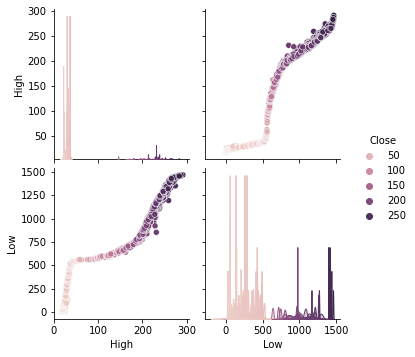

In [47]:
sns.pairplot(df.iloc[:,0:3], hue="Close")

In [48]:
len(df.Close.unique())

1528

In [49]:
X=df.iloc[:,0:2].values
Y=df.iloc[:,1].values

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=0)

In [51]:
from sklearn.preprocessing import StandardScaler
X_train=StandardScaler().fit_transform(X_train)
X_test=StandardScaler().fit_transform(X_test)

In [52]:
def models(X_train,Y_train):
    
    from sklearn.linear_model import LogisticRegression
    log=LogisticRegression(random_state=0)
    log.fit(X_train,Y_train)
    
    from sklearn.ensemble import RandomForestClassifier
    forest=RandomForestClassifier(random_state=0,criterion="entropy",n_estimators=10)
    forest.fit(X_train,Y_train)
    
    from sklearn.tree import DecisionTreeClassifier
    tree=DecisionTreeClassifier(random_state=0,criterion="entropy")
    tree.fit(X_train,Y_train)
        
    print('[0]logistic regression accuracy:',log.score(X_train,Y_train))
    print('[1]Decision tree accuracy:',tree.score(X_train,Y_train))
    print('[2]Random forest accuracy:',forest.score(X_train,Y_train))
        
    return log,tree,forest

In [53]:
model=models(X_train,Y_train)

[0]logistic regression accuracy: 0.014781966001478197
[1]Decision tree accuracy: 1.0
[2]Random forest accuracy: 0.9696969696969697


In [54]:
# very low accuracy: logistic regression 0.015 with a 0.7 average
# Decision tree accuracy: 1.0 and Random forest accuracy: 0.97

In [55]:
pred=model[2].predict(X_test)
print('Predicted values: ')
print(pred)
print('Actual values:')
print(Y_test)

Predicted values: 
[ 408 1326  882   34 1439  492  375  492  288 1272  925  662  879  778
 1082 1439  555  515 1068 1076  188  617  886  358  468  823  492   41
 1090 1082  879  765  735  161 1230  383  322  449  408  492   77  590
 1018  408  139  177  304  408  803  701  492 1464  356  848  288  631
 1046 1228  866   41  767  492  670   65 1331   65  949 1283 1338  478
 1028 1433   41  620 1308 1185  118  383 1278  165  408 1061  721  322
  439  408 1145 1283  492 1058  560  299  531 1125 1433  617  940  860
 1129  657  713  888 1180  161  504 1454 1439   41 1019  753  574  809
 1354  288  504  288  356  288 1433  375  408  297  297  560  902   30
  119  947  802  492  408  478 1260  322 1032  139  756  443 1053 1178
 1433  778  541 1424  596   65 1423 1153  119  829 1270 1003  954 1219
   16  668  905  986  408  587  408 1023  100  882 1214 1301 1396  541
  255   65  119 1212  161  587  408  161  920  449  721 1373  119  526
 1093   77 1092  801  940  288  526  746 1453 1097  139  1